<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_1893/NGC_1893_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [ ]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 3.7MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 2.6MB 46.1MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=b70d54e776d1f729cca9b1c1d82ed932dfae52723bf7fc9651de2e368f52d9a5
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [ ]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [ ]:
## making a GAIA cone_search of 30m radius around NGC1893 center

coordinate = coord.SkyCoord.from_name('NGC1893')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (80.6833, 33.4117)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [ ]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 181173647673361280,181173647673361280,1483864201,2015.5,80.684603,0.033843,33.412081,0.025595,0.353639,0.036231,9.760555,0.137340,0.065628,-1.251084,0.043157,-0.404071,0.126200,-0.415880,0.464060,-0.331484,0.289410,-0.543771,0.352913,0.232732,-0.329534,142,0,142,0,0.819498,150.307465,0.000000,0.000000,31,False,82.927475,1.677050,0.007350,-0.170126,...,40087.897710,88.817455,451.351562,13.254387,1.216119,0,0.474896,0.147382,0.327515,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585244,-1.679365,82.108439,10.227637,100001,7270.930176,7098.100098,7807.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.939201,2.549417,3.084076,21.752707,16.569754,26.935659,https://gea.esac.esa.int/data-server/datalink/...,,0.001147
1,1635721458409799680,Gaia DR2 181173647670255232,181173647670255232,694905700,2015.5,80.685344,0.317080,33.410823,0.253937,-0.136818,0.395804,-0.345672,1.221537,0.727228,-1.041465,0.503148,-0.313737,0.232041,0.194107,0.056717,-0.537575,0.002978,-0.240740,0.063160,0.401163,-0.475289,142,0,141,1,1.439612,160.405792,0.000000,0.006779,31,False,0.249249,1.534035,0.072411,-0.180904,...,546.698549,21.273059,25.699104,17.917551,1.915866,0,1.102009,-0.004078,1.106087,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.586632,-1.679567,82.108983,10.226341,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001910
2,1635721458409799680,Gaia DR2 181173643375562240,181173643375562240,751395326,2015.5,80.682794,0.280308,33.414174,0.230233,0.476046,0.359589,1.323862,-2.477787,0.608541,-0.443799,0.435851,-0.314617,0.331319,0.186329,0.131048,-0.560377,-0.047011,-0.207994,0.190062,0.359596,-0.403558,143,0,143,0,0.208735,140.820099,0.000000,0.000000,31,False,0.309160,1.443662,0.064041,-0.131571,...,806.455459,9.672464,83.376427,17.495468,2.004344,0,1.870014,0.479704,1.390310,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.582663,-1.679426,82.107047,10.229824,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002516
3,1635721458409799680,Gaia DR2 181173647670249088,181173647670249088,484695233,2015.5,80.682736,0.260291,33.414937,0.213979,0.567555,0.327464,1.733185,0.489020,0.535777,-2.092622,0.383637,-0.336726,0.304620,0.056802,0.243668,-0.532871,0.045078,-0.304211,0.221608,0.356029,-0.351383,147,0,147,0,2.146245,180.543427,0.678741,1.620727,31,False,0.349386,1.386778,0.058317,-0.127316,...,875.127187,14.162034,61.793892,17.406742,1.738860,0,1.806957,0.586079,1.220879,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.582006,-1.679034,82.107049,10.230589,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.es

##### Applying Filter:

In [ ]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [186]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [187]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered.pmra_error < 0.3) & (all_stars_filtered.pmdec_error < 0.3)]

In [188]:
all_stars_filtered.shape

(12593, 99)

##### Visualizing GAIA data

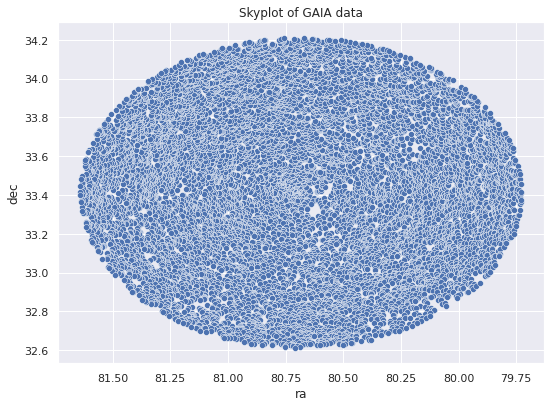

In [189]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [190]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [191]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [192]:
## saving only NGC 1893 data from Cantat GAIA DR2 paper

cantat_1893 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_1893")
cantat_1893 = cantat_1893[0].to_pandas()
cantat_1893

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,81.149455,33.284768,182470723501404800,0.3615,0.117,-0.714,NaN,17.414000,1.2091,0.1,NGC_1893,81.149455,33.284771
1,81.119439,33.363766,182472308346167936,0.2641,-0.608,-0.591,39.269804,13.264800,1.9393,0.1,NGC_1893,81.119442,33.363768
2,81.131238,33.508885,182486842515427840,0.1172,0.070,-0.804,NaN,16.060801,1.9589,0.2,NGC_1893,81.131237,33.508888
3,81.006873,33.548464,182490690806147712,0.2768,-0.094,-1.682,NaN,14.954500,1.8016,0.8,NGC_1893,81.006874,33.548471
4,81.122228,33.440556,182485949162263680,0.2378,0.316,-1.816,NaN,17.271099,1.3154,0.3,NGC_1893,81.122226,33.440563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,80.738744,33.441257,181174128709666304,0.3098,-0.185,-1.245,NaN,14.454100,0.5358,0.9,NGC_1893,80.738745,33.441263
490,80.759437,33.527037,181177044990761088,0.3628,-0.031,-0.890,NaN,11.109000,0.3429,0.5,NGC_1893,80.759438,33.527041
491,80.486479,33.742721,181197695194288640,0.3737,0.487,-1.105,NaN,17.628500,1.3684,0.1,NGC_1893,80.486477,33.742726
492,80.688044,33.406547,181173643374509824,0.3148,-0.548,-1.372,NaN,12.207800,0.4295,0.6,NGC_1893,80.688047,33.406553


In [193]:
# renaming the cantat table to match it with gaia_data
cantat_1893 = cantat_1893.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [194]:
# taking the subset of only source_id and PMemb
cantat_1893 = cantat_1893.loc[:,['source_id', 'PMemb']]


In [195]:
# join the two table on source_id
cantat_1893 = all_stars_filtered.join(cantat_1893.set_index('source_id'), on='source_id')

In [196]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_1893 = cantat_1893.dropna(subset=['PMemb'])
cantat_1893

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
0,1635721458409799680,Gaia DR2 181173647673361280,181173647673361280,1483864201,2015.5,80.684603,0.033843,33.412081,0.025595,0.353639,0.036231,9.760555,0.137340,0.065628,-1.251084,0.043157,-0.404071,0.126200,-0.415880,0.464060,-0.331484,0.289410,-0.543771,0.352913,0.232732,-0.329534,142,0,142,0,0.819498,150.307465,0.000000,0.000000e+00,31,False,82.927475,1.677050,0.007350,-0.170126,...,13.254387,1.216119,0,0.474896,0.147382,0.327515,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585244,-1.679365,82.108439,10.227637,100001,7270.930176,7098.100098,7807.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.939201,2.549417,3.084076,21.752707,16.569754,26.935659,https://gea.esac.esa.int/data-server/datalink/...,,0.001147,2.092689,28.989351,0.6
19,1635721458409799680,Gaia DR2 181173643374509824,181173643374509824,12658542,2015.5,80.688044,0.073149,33.406547,0.053959,0.314849,0.089981,3.499050,-0.548015,0.129628,-1.372174,0.091755,-0.230392,0.371752,-0.130362,0.362375,-0.409524,0.102849,-0.457819,0.315687,0.418044,-0.088826,139,139,134,5,16.238333,603.241150,0.159951,7.469649e+00,31,True,32.085251,1.686489,0.019010,-0.035129,...,11.908504,1.211550,0,0.429462,0.130186,0.299276,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.591435,-1.680128,82.110984,10.221927,100001,7501.000000,7178.500000,7841.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.006490,4.227584,14.954793,0.6
22,1635721458409799680,Gaia DR2 181174403587604224,181174403587604224,1269934252,2015.5,80.679222,0.027111,33.418166,0.021730,0.312039,0.032525,9.593742,-0.268702,0.049882,-1.387273,0.035424,-0.246148,0.266331,-0.228977,0.354428,-0.449093,0.136382,-0.492036,0.280176,0.374393,-0.087387,160,0,160,0,-4.178366,91.986031,0.000000,0.000000e+00,31,False,123.804367,1.541493,0.006539,-0.101404,...,12.509538,1.268399,0,1.155943,0.477227,0.678716,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.577683,-1.679625,82.104290,10.234003,100001,4899.190430,4818.000000,4986.669922,NaN,NaN,NaN,NaN,NaN,NaN,200111,9.398450,9.071594,9.717874,45.846313,34.468830,57.223797,https://gea.esac.esa.int/data-server/datalink/...,,0.007315,5.386812,39.162434,1.0
33,1635721458409799680,Gaia DR2 181174025630479360,181174025630479360,29884937,2015.5,80.692027,0.047236,33.416048,0.032241,0.352295,0.064405,5.470024,-0.247113,0.068936,-1.468851,0.051523,-0.507853,0.646235,0.146307,0.535540,-0.635479,-0.073588,-0.601952,0.417870,0.597423,0.043620,131,0,129,2,-3.345325,77.936180,0.000000,0.000000e+00,31,False,65.744781,1.676015,0.009007,-0.171690,...,13.461381,1.230588,0,0.590916,0.191039,0.399877,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585480,-1.672010,82.114987,10.231190,100001,6852.666504,6480.000000,7243.500000,NaN,NaN,NaN,NaN,NaN,NaN,

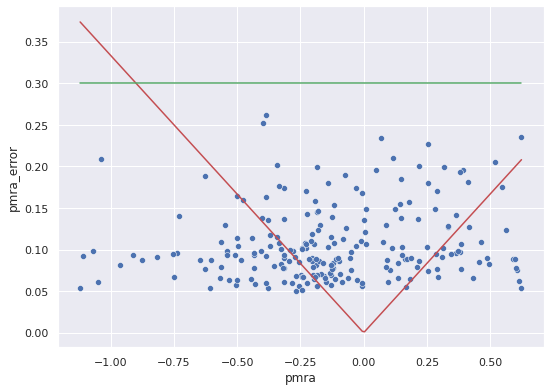

In [197]:
sns.scatterplot(x='pmra', y='pmra_error', data=cantat_1893)
sns.lineplot(x=cantat_1893.pmra, y=abs(cantat_1893.pmra/3), color='r')
sns.lineplot(x=cantat_1893.pmra, y=0.3, color='g')

In [198]:
(cantat_1893.pmra_error > 0.3).value_counts()

False    218
Name: pmra_error, dtype: int64

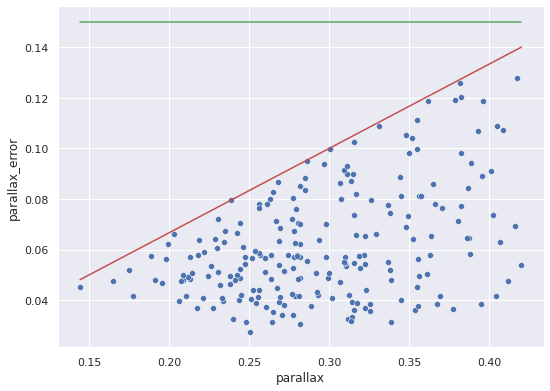

In [199]:
sns.scatterplot(x='parallax', y='parallax_error', data=cantat_1893)
sns.lineplot(x=cantat_1893.parallax, y=abs(cantat_1893.parallax/3), color='r')
sns.lineplot(x=cantat_1893.parallax, y=0.15, color='g')

In [200]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_1893.to_csv('NGC_1893_cantat.csv')
# all_stars.to_csv('NGC_1893_Gaia_30m.csv')

In [201]:
cantat_1893.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,2.180000e+02,2.180000e+02,2.180000e+02,218.0,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,2.180000e+02,218.0,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,2.000000,2.000000,218.000000,2.000000,2.000000,2.0,218.000000,218.000000,218.000000,218.000000,214.000000,214.000000,214.000000,214.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,218.000000,218.000000,218.000000,218.000000
mean,1.635721e+18,1.814099e+17,9.066911e+08,2015.5,80.735838,0.054016,33.446463,0.043271,0.294869,0.061501,5.259032,-0.126039,0.106456,-1.383908,0.075618,-0.210782,0.169138,-0.211395,0.273969,-0.392685,0.171145,-0.488370,0.151342,0.357788,-0.153693,147.371560,14.587156,146.435780,0.935780,0.619331,158.982635,0.024371,3.236815e-01,31.0,50.201633,1.555050,0.011626,-0.112133,16.738532,10.279817,...,4.793110e+04,102.760294,431.480804,14.312852,1.274699,0.045872,1.113295,0.473550,0.639745,18.699157,0.960644,0.036697,5750.000000,4.000000,0.0,173.580938,-1.624572,82.154078,10.259270,100038.429907,5475.005859,5268.627441,5811.743164,1.371115,1.102307,1.727278,0.684257,0.544896,0.864200,200111.0,7.435204,6.378483,8.135204,72.355545,54.608334,90.102730,0.194730,3.431432,21.168535,0.530275
std,0.000000e+00,5.894116e+14,5.174157e+08,0.0,0.198437,0.020562,0.152866,0.015779,0.058947,0.021731,1.829656,0.365250,0.044133,0.334835,0.031492,0.192402,0.137975,0.170830,0.170493,0.107384,0.144685,0.123856,0.139672,0.103659,0.196173,19.022774,42.271279,18.936907,1.318253,3.232102,75.675659,0.054305,9.904181e-01,0.0,84.202904,0.097577,0.003992,0.070962,2.140348,0.767818,...,1.272232e+05,279.847577,378.524506,1.424037,0.064743,0.209688,0.508193,0.280122,0.232636,29.091288,0.217557,0.427760,353.553406,0.707107,0.0,0.153664,0.164926,0.168721,0.152408,271.495566,1259.684937,1200.739136,1286.522583,0.472598,0.478796,0.499179,0.233505,0.238132,0.255513,0.0,5.044431,4.305860,5.516739,129.711990,98.694420,160.921799,0.125914,2.994966,9.005566,0.341049
min,1.635721e+18,1.809519e+17,6.862069e+06,2015.5,80.190774,0.025518,33.046711,0.020848,0.144446,0.027534,3.002039,-1.120928,0.049882,-2.314877,0.035424,-0.794666,-0.161197,-0.656294,-0.268225,-0.650375,-0.169092,-0.772315,-0.464610,0.014066,-0.751447,88.000000,0.000000,87.000000,0.000000,-5.

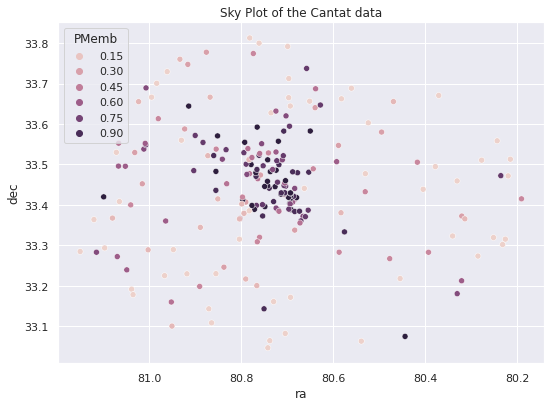

In [202]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_1893['ra'], y = cantat_1893['dec'], 
                          hue = cantat_1893['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [203]:
# import member dataset
member = cantat_1893.copy()

In [204]:
### adding their distance from the center of the clusters

## NGC 1893
center = coord.SkyCoord.from_name('NGC1893')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_1893_center'] = distance

In [205]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_1893_center)
cantat_radius

0.4111262179446499

In [206]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1893_center,member
0,1635721458409799680,Gaia DR2 181173647673361280,181173647673361280,1483864201,2015.5,80.684603,0.033843,33.412081,0.025595,0.353639,0.036231,9.760555,0.137340,0.065628,-1.251084,0.043157,-0.404071,0.126200,-0.415880,0.464060,-0.331484,0.289410,-0.543771,0.352913,0.232732,-0.329534,142,0,142,0,0.819498,150.307465,0.000000,0.000000e+00,31,False,82.927475,1.677050,0.007350,-0.170126,...,0,0.474896,0.147382,0.327515,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585244,-1.679365,82.108439,10.227637,100001,7270.930176,7098.100098,7807.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.939201,2.549417,3.084076,21.752707,16.569754,26.935659,https://gea.esac.esa.int/data-server/datalink/...,,0.001147,2.092689,28.989351,0.6,0.001152,1
19,1635721458409799680,Gaia DR2 181173643374509824,181173643374509824,12658542,2015.5,80.688044,0.073149,33.406547,0.053959,0.314849,0.089981,3.499050,-0.548015,0.129628,-1.372174,0.091755,-0.230392,0.371752,-0.130362,0.362375,-0.409524,0.102849,-0.457819,0.315687,0.418044,-0.088826,139,139,134,5,16.238333,603.241150,0.159951,7.469649e+00,31,True,32.085251,1.686489,0.019010,-0.035129,...,0,0.429462,0.130186,0.299276,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.591435,-1.680128,82.110984,10.221927,100001,7501.000000,7178.500000,7841.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.006490,4.227584,14.954793,0.6,0.006499,1
22,1635721458409799680,Gaia DR2 181174403587604224,181174403587604224,1269934252,2015.5,80.679222,0.027111,33.418166,0.021730,0.312039,0.032525,9.593742,-0.268702,0.049882,-1.387273,0.035424,-0.246148,0.266331,-0.228977,0.354428,-0.449093,0.136382,-0.492036,0.280176,0.374393,-0.087387,160,0,160,0,-4.178366,91.986031,0.000000,0.000000e+00,31,False,123.804367,1.541493,0.006539,-0.101404,...,0,1.155943,0.477227,0.678716,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.577683,-1.679625,82.104290,10.234003,100001,4899.190430,4818.000000,4986.669922,NaN,NaN,NaN,NaN,NaN,NaN,200111,9.398450,9.071594,9.717874,45.846313,34.468830,57.223797,https://gea.esac.esa.int/data-server/datalink/...,,0.007315,5.386812,39.162434,1.0,0.007307,1
33,1635721458409799680,Gaia DR2 181174025630479360,181174025630479360,29884937,2015.5,80.692027,0.047236,33.416048,0.032241,0.352295,0.064405,5.470024,-0.247113,0.068936,-1.468851,0.051523,-0.507853,0.646235,0.146307,0.535540,-0.635479,-0.073588,-0.601952,0.417870,0.597423,0.043620,131,0,129,2,-3.345325,77.936180,0.000000,0.000000e+00,31,False,65.744781,1.676015,0.009007,-0.171690,...,0,0.590916,0.191039,0.399877,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585480,-1.672010,82.114987,10.231190,100001,6852.666504,6480.000000,7243.500000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-se

In [207]:
### adding their distance from the center of the clusters

## NGC 1893
center = coord.SkyCoord.from_name('NGC1893')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_1893_center'] = distance

In [208]:
non_member = all_stars_filtered[all_stars_filtered['dist_1893_center'] >= 0.7].sample(len(member), random_state = 42)

In [209]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_1893_center,member
70354,1635721458409799680,Gaia DR2 181201302964471680,181201302964471680,1087183955,2015.5,79.829416,0.064367,33.273771,0.051553,1.607278,0.072370,22.209261,-7.172095,0.151072,-18.337526,0.108354,-0.188498,0.228660,-0.004750,0.044775,-0.383148,0.006688,-0.247310,-0.005717,0.305345,-0.343108,141,0,140,1,0.810884,148.057236,0.000000,0.000000e+00,31,False,5.563250,1.413489,0.014965,-0.145093,...,1.321226,0,1.799321,0.878542,0.920779,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.292061,-2.345452,81.374677,10.138512,100001,4133.319824,3889.959961,4625.075195,0.9610,0.7749,1.2650,0.495,0.3713,0.6201,200111,0.665564,0.531558,0.751446,0.116485,0.105444,0.127526,https://gea.esac.esa.int/data-server/datalink/...,,0.726549,47.474839,169.237527,0.727099,0
79213,1635721458409799680,Gaia DR2 181265212079416320,181265212079416320,95489498,2015.5,80.226781,0.036752,34.083986,0.028851,0.406584,0.042603,9.543598,1.005288,0.087595,-2.370421,0.057621,-0.103378,0.105005,-0.077980,0.103463,-0.247562,0.143172,-0.312869,-0.162049,0.413086,-0.298824,158,158,157,1,1.481628,178.580872,0.000000,1.141443e-15,31,True,369.357697,1.580567,0.008638,-0.118235,...,1.235096,1,0.978511,0.398200,0.580311,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,172.815695,-1.611193,81.767922,10.923568,100002,5212.024902,4975.473145,5426.814941,NaN,NaN,NaN,NaN,NaN,NaN,200111,10.746129,9.912313,11.792237,76.775864,65.229347,88.322380,https://gea.esac.esa.int/data-server/datalink/...,,0.772053,11.476513,41.137958,0.771314,0
73713,1635721458409799680,Gaia DR2 182714299683694336,182714299683694336,35513368,2015.5,81.227945,0.076417,34.001762,0.065417,0.352437,0.091894,3.835246,0.229084,0.157254,-2.114599,0.120726,-0.199719,0.204190,-0.147351,0.280933,-0.423111,0.112331,-0.374095,0.276738,0.271179,-0.259150,131,0,131,0,2.359872,166.493057,0.222787,1.743904e+00,31,False,4.346077,1.514447,0.016758,-0.104724,...,1.272794,0,1.302489,0.567722,0.734767,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.352922,-0.973619,82.605353,10.787380,100001,4941.750000,4739.496582,5110.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.743944,1.456780,17.515673,0.742997,0
76966,1635721458409799680,Gaia DR2 182718598949717248,182718598949717248,276948166,2015.5,81.121299,0.089543,34.079362,0.074193,2.393998,0.097553,24.540573,-14.128550,0.189673,-30.987641,0.139017,-0.306155,0.194978,-0.174532,0.344641,-0.337186,0.229345,-0.266444,0.211781,0.233986,-0.374733,151,0,150,1,3.331322,208.599731,0.347181,3.517584e+00,31,False,2.717217,1.361232,0.020006,-0.185139,...,1.392287,0,2.299283,1.217829,1.081454,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.239054,-1.003100,82.520463,10.870321,100001,4049.910156,3945.959961,4108.757324,NaN,NaN,

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


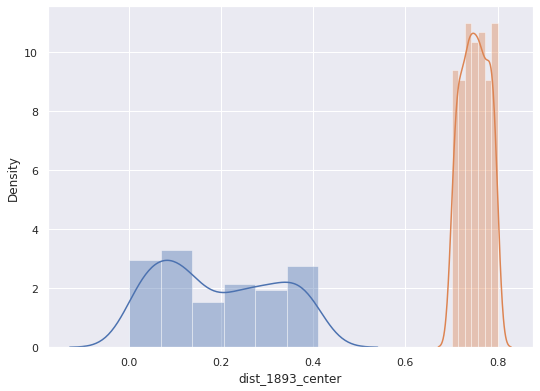

In [210]:
sns.distplot(member['dist_1893_center'])
sns.distplot(non_member['dist_1893_center'])
plt.show()

In [211]:
training_data = pd.concat([member, non_member])

In [212]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1893_center,member
count,4.360000e+02,4.360000e+02,4.360000e+02,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,...,433.000000,433.000000,433.000000,436.000000,433.000000,433.000000,433.000000,9.000000,9.000000,436.000000,9.000000,9.000000,9.0,436.000000,436.000000,436.000000,436.000000,382.000000,382.000000,382.000000,382.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,436.000000,436.000000,436.000000,218.000000,436.000000,436.000000
mean,1.635721e+18,1.815889e+17,8.799864e+08,2015.5,80.724438,0.060803,33.436926,0.049169,0.540011,0.068779,9.363209,0.613705,0.123544,-2.441588,0.088234,-0.182652,0.149168,-0.213374,0.256199,-0.369727,0.175457,-0.456029,0.130052,0.343736,-0.163834,152.224771,10.357798,151.344037,0.880734,0.685611,171.380219,0.044456,0.951519,31.0,38.012741,1.533423,0.013587,-0.095738,17.314220,10.337156,...,396.066681,14.694440,1.278450,0.061927,1.212410,0.527064,0.685347,3.870716,0.917527,0.089450,5277.777832,3.666667,0.0,173.582862,-1.637258,82.143931,10.250914,100037.704188,5234.883301,5040.384277,5542.086914,1.064794,0.822499,1.367939,0.530326,0.403949,0.682576,200111.0,4.075350,3.580972,4.451309,31.130095,24.494041,37.766136,0.472741,15.143598,35.723146,0.530275,0.472714,0.500000
std,0.000000e+00,7.069251e+14,4.999802e+08,0.0,0.477133,0.027522,0.386501,0.022470,0.572909,0.030458,11.110765,4.152835,0.060459,3.337899,0.044124,0.173773,0.132485,0.166535,0.159371,0.110808,0.131124,0.135303,0.148688,0.104317,0.189787,19.405058,37.345242,19.327569,1.318130,4.107844,152.721069,0.101161,6.249678,0.0,74.261734,0.086858,0.006357,0.069733,2.182455,0.719895,...,321.212097,1.457546,0.070308,0.268362,0.454176,0.259316,0.203368,27.066715,0.363117,0.670412,754.615479,0.661438,0.0,0.400689,0.384056,0.403139,0.388003,268.589157,1063.714722,1015.093933,1106.455444,0.543443,0.521759,0.612994,0.270599,0.258778,0.309150,0.0,9.091128,7.879570,10.131936,135.699936,109.539139,162.026566,0.292896,31.867644,43.414638,0.341049,0.292869,0.500574
min,1.635721e+18,1.808473e+17,6.862069e+06,2015.5,79.729496,0.022096,32.612023,0.017781,0.144446,0.023658,3.002039,-37.826370,0.043361,-30.987641,0.030949,-0.794666,-0.235615,-0.656294,-0.305248,-0.676243,-0.246087,-0.772315,-0.581862,-0.046338,-0.843669,88.000000,0.000000,87.000000,0.000000,-7.302475,58.454506,0.00

In [213]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [214]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,436.000000,436.000000,436.000000
mean,0.540011,0.613705,-2.441588
std,0.572909,4.152835,3.337900
min,0.144446,-37.826370,-30.987640
25%,0.279864,-0.315928,-2.772952
50%,0.357568,0.059849,-1.501064
75%,0.583238,0.950941,-1.208374
max,7.704194,34.639885,6.797863


In [215]:
targets.value_counts()

1    218
0    218
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


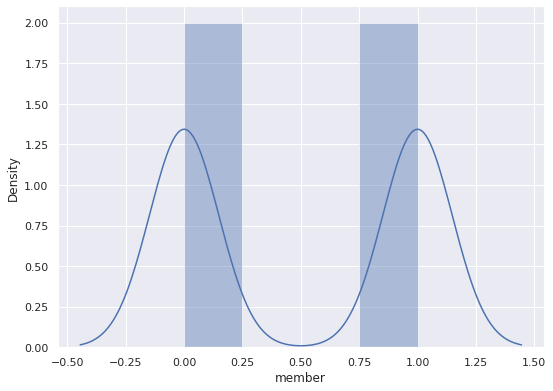

In [216]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

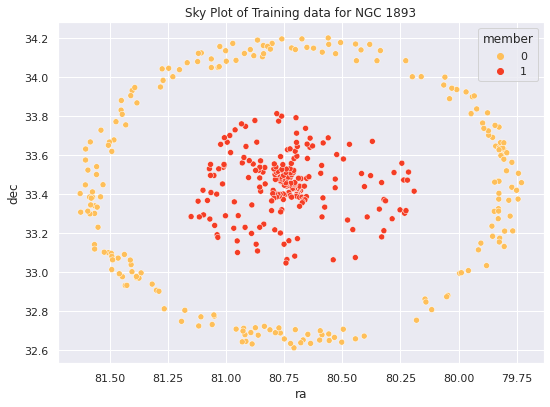

In [217]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 1893')
plt.show()

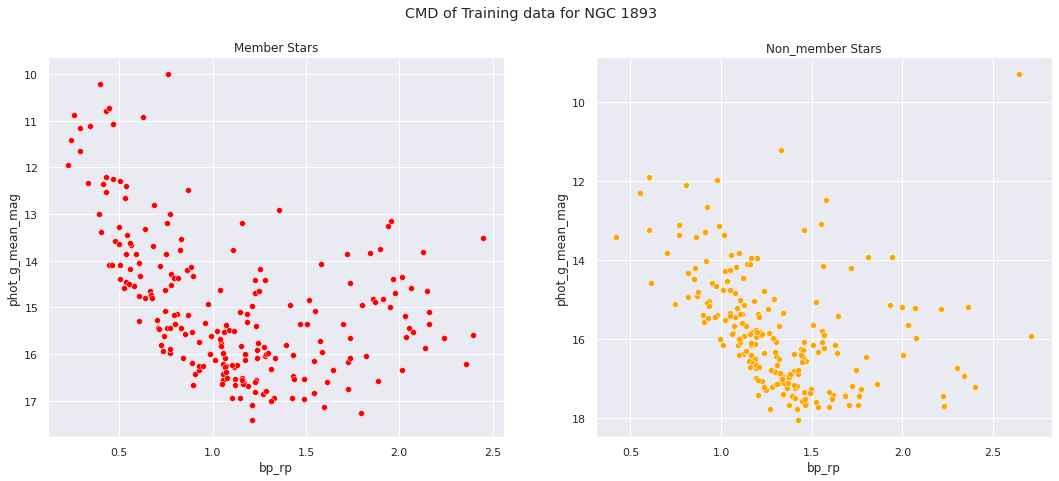

In [218]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 1893 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


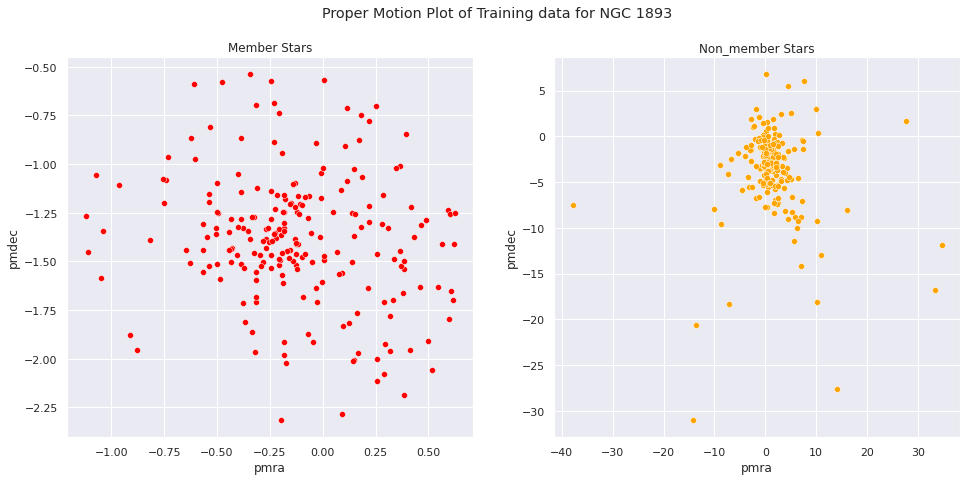

In [219]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 1893 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


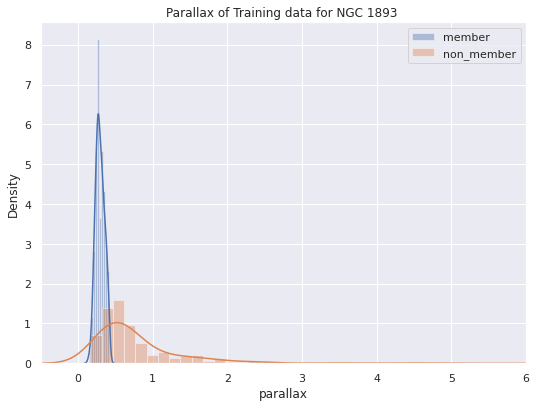

In [220]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 1893 ')
plt.legend()
plt.show()

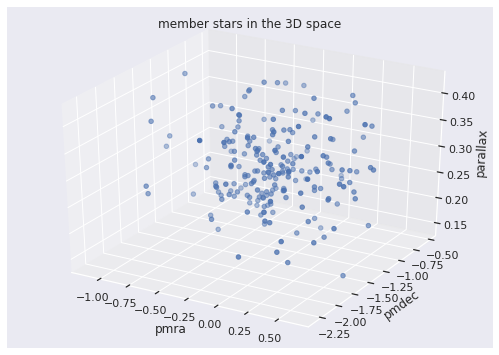

In [221]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


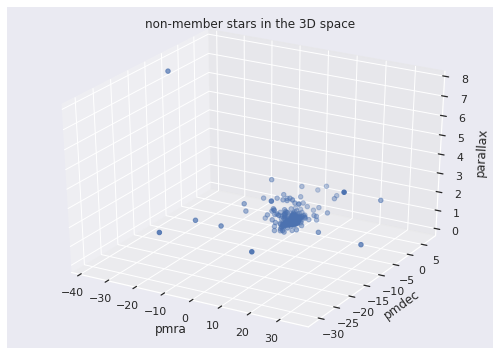

In [222]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [223]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [224]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

parallax    0.411991
pmdec       0.300147
pmra        0.287863
dtype: float64

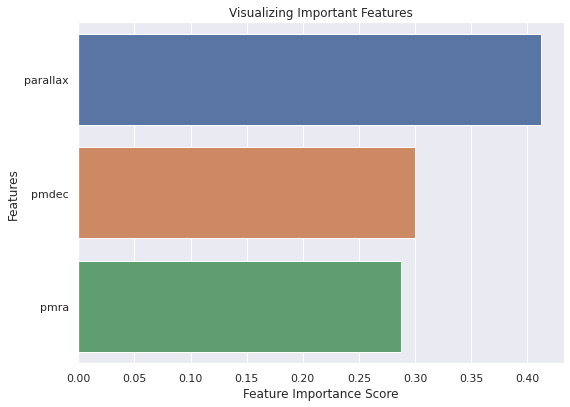

In [225]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [226]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [227]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [228]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [229]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [230]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [231]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [232]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.917
Accuracy on test data: 0.939


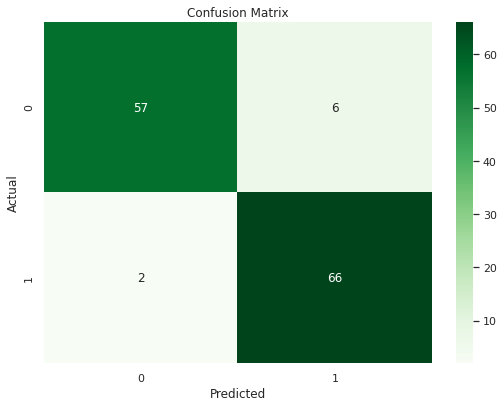

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.92      0.97      0.94        68

    accuracy                           0.94       131
   macro avg       0.94      0.94      0.94       131
weighted avg       0.94      0.94      0.94       131



In [233]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.918
Accuracy on test data: 0.947


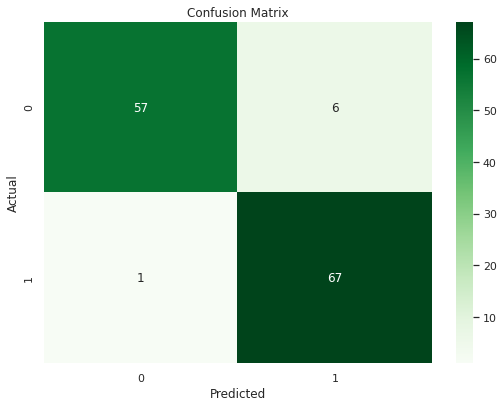

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.92      0.99      0.95        68

    accuracy                           0.95       131
   macro avg       0.95      0.95      0.95       131
weighted avg       0.95      0.95      0.95       131



In [234]:
best_random = rfc_random.best_estimator_
best_random.fit(train_features, train_targets)

evaluate_model(best_random)


### Prediction for the new stars

In [235]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1893_center
count,1.259300e+04,1.259300e+04,1.259300e+04,12593.0,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.0,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,12593.000000,...,1.251700e+04,12517.000000,12517.000000,12517.000000,12517.000000,12593.000000,12517.000000,12517.000000,12517.000000,479.000000,479.000000,12593.000000,479.000000,479.000000,479.000000,12593.000000,12593.000000,12593.000000,12593.000000,10217.000000,10217.000000,10217.000000,10217.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,6116.0,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,12593.000000,12593.000000,12593.000000,12593.000000
mean,1.635721e+18,1.816609e+17,8.486037e+08,2015.5,80.700746,0.067893,33.423687,0.055004,0.766706,0.076037,12.918118,1.575803,0.139660,-4.126820,0.100739,-0.161195,0.131275,-0.213885,0.241481,-0.346062,0.183528,-0.437335,0.114960,0.337043,-0.182457,152.558008,8.159930,151.698960,0.859049,0.523530,168.963837,0.056636,1.018115,31.0,29.330427,1.516517,0.014949,-0.084310,17.414913,10.337171,...,3.303427e+04,72.784764,377.757599,15.021540,1.280448,0.053681,1.295251,0.572443,0.722808,4.018896,2.261566,0.191694,5264.404785,3.529227,-0.071503,173.582498,-1.661159,82.122899,10.239017,100021.805227,4977.315918,4801.420410,5243.068359,0.903781,0.670757,1.165626,0.447758,0.330171,0.579704,200111.0,2.399353,2.167357,2.579000,7.497919,6.196751,8.799045,0.533173,23.837805,58.386130,0.533154
std,0.000000e+00,7.382340e+14,4.854810e+08,0.0,0.482875,0.032171,0.395818,0.026228,0.844919,0.036096,17.154442,7.255510,0.068616,9.834921,0.050995,0.178056,0.137498,0.167191,0.173785,0.111884,0.133821,0.134649,0.149151,0.104937,0.182822,18.363148,34.236218,18.267399,1.329905,4.048410,168.979584,0.118994,6.313072,0.0,65.662750,0.072488,0.007167,0.067132,2.048008,0.728153,...,1.855704e+05,535.043892,275.662079,1.408673,0.075922,0.247880,0.382294,0.224637,0.168140,32.501057,2.778208,1.017214,695.413086,0.634751,0.315196,0.393533,0.405406,0.410171,0.395182,202.709358,734.188477,710.106445,771.287415,0.522101,0.488002,0.583931,0.261526,0.241987,0.295611,0.0,4.047160,3.632703,4.375883,36.246632,29.804123,42.779556,0.187541,65.514535,131.335355,0.187522
min,1.635721e+18,1.808463e+17,5.848460e+05,2015.5,79.727501,0.021139,32.612023,0.017093,0.108522,0.022131,3.000474,-80.417052,0.0

In [236]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_1893_center'] <= cantat_radius*2]

In [237]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [238]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [239]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [240]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    11398
1      759
Name: member, dtype: int64

In [241]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

765

In [242]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

759

In [243]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1893_center,member,PMemb
count,7.590000e+02,7.590000e+02,7.590000e+02,759.0,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.0,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,...,754.000000,754.000000,754.000000,759.000000,754.000000,754.000000,754.000000,30.000000,30.000000,759.000000,30.000000,30.000000,30.000000,759.000000,759.000000,759.000000,759.000000,705.000000,705.000000,705.000000,705.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,142.0,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,759.000000,759.000000,759.000000,759.000000,759.0,759.000000
mean,1.635721e+18,1.817826e+17,8.585704e+08,2015.5,80.711459,0.056895,33.452811,0.046018,0.308727,0.063166,5.516627,-0.055639,0.118112,-1.346075,0.085015,-0.135976,0.122216,-0.214909,0.233338,-0.328618,0.190269,-0.423837,0.098632,0.331217,-0.170932,154.415020,4.322793,153.656126,0.758893,0.456011,164.084808,0.043859,0.773425,31.0,22.646255,1.507248,0.012686,-0.075198,17.632411,10.384717,...,423.829163,14.834781,1.287198,0.050066,1.366192,0.618422,0.747768,-5.038932,2.487029,0.205534,4833.333496,3.200000,-0.050000,173.563390,-1.637283,82.133861,10.267592,100018.066667,4795.313965,4613.414062,5091.990723,1.458566,1.212831,1.822708,0.724047,0.596094,0.915195,200111.0,6.899108,6.079762,7.450077,25.715347,19.721205,31.709497,0.586961,4.516939,19.089215,0.586926,1.0,0.845938
std,0.000000e+00,7.582381e+14,4.838084e+08,0.0,0.515804,0.022295,0.422409,0.017781,0.068241,0.024112,2.347140,0.584548,0.050456,0.511451,0.037772,0.168541,0.126322,0.153417,0.165915,0.107888,0.134369,0.136914,0.138642,0.099683,0.185051,17.381118,24.506311,17.276322,1.222523,3.225474,100.415161,0.088046,4.143088,0.0,43.679214,0.080754,0.005133,0.063906,1.936472,0.661475,...,266.054901,1.212851,0.059859,0.235664,0.448274,0.269451,0.182492,29.423438,3.712880,1.053914,577.350220,0.406838,0.273861,0.414877,0.437837,0.438825,0.420974,183.845777,727.825378,700.540771,742.316040,0.488570,0.491354,0.521824,0.248114,0.245517,0.268839,0.0,6.112293,5.446340,6.581237,34.884380,27.042797,42.796741,0.145021,4.587002,11.339354,0.145004,0.0,0.146922
min,1.635721e+18,1.808465e+17,7.999830e+05,2015.5,79.738642,0.021950,32.625572,0.017849,0.122448,0.025537,3.001365,-3.946473,0.045293,-2.498719,0.030623,-0.729759,-0.330800,-0.683510,-0.385622,-0.796510,-0.323467,-0.792226,-0.571098,-0.074354,-0.819508,104.000000,0.000000,104.000000,0.000000,-5.617080,55.823700,0.00000

In [244]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1893_center,member
count,2.180000e+02,2.180000e+02,2.180000e+02,218.0,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,2.180000e+02,218.0,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,2.000000,2.000000,218.000000,2.000000,2.000000,2.0,218.000000,218.000000,218.000000,218.000000,214.000000,214.000000,214.000000,214.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,1.635721e+18,1.814099e+17,9.066911e+08,2015.5,80.735838,0.054016,33.446463,0.043271,0.294869,0.061501,5.259032,-0.126039,0.106456,-1.383908,0.075618,-0.210782,0.169138,-0.211395,0.273969,-0.392685,0.171145,-0.488370,0.151342,0.357788,-0.153693,147.371560,14.587156,146.435780,0.935780,0.619331,158.982635,0.024371,3.236815e-01,31.0,50.201633,1.555050,0.011626,-0.112133,16.738532,10.279817,...,431.480804,14.312852,1.274699,0.045872,1.113295,0.473550,0.639745,18.699157,0.960644,0.036697,5750.000000,4.000000,0.0,173.580938,-1.624572,82.154078,10.259270,100038.429907,5475.005859,5268.627441,5811.743164,1.371115,1.102307,1.727278,0.684257,0.544896,0.864200,200111.0,7.435204,6.378483,8.135204,72.355545,54.608334,90.102730,0.194730,3.431432,21.168535,0.530275,0.194725,1.0
std,0.000000e+00,5.894116e+14,5.174157e+08,0.0,0.198437,0.020562,0.152866,0.015779,0.058947,0.021731,1.829656,0.365250,0.044133,0.334835,0.031492,0.192402,0.137975,0.170830,0.170493,0.107384,0.144685,0.123856,0.139672,0.103659,0.196173,19.022774,42.271279,18.936907,1.318253,3.232102,75.675659,0.054305,9.904181e-01,0.0,84.202904,0.097577,0.003992,0.070962,2.140348,0.767818,...,378.524506,1.424037,0.064743,0.209688,0.508193,0.280122,0.232636,29.091288,0.217557,0.427760,353.553406,0.707107,0.0,0.153664,0.164926,0.168721,0.152408,271.495566,1259.684937,1200.739136,1286.522583,0.472598,0.478796,0.499179,0.233505,0.238132,0.255513,0.0,5.044431,4.305860,5.516739,129.711990,98.694420,160.921799,0.125914,2.994966,9.005566,0.341049,0.125914,0.0
min,1.635721e+18,1.809519e+17,6.862069e+06,2015.5,80.190774,0.025518,33.046711,0.020848,0.144446,0.027534,3.002039,-1.120928,0.049882,-2.314877,0.035424,-0.794666,-0.161197,-0.656294,-0.268225,-0.650375,-0.169092,-0.772315,-0.464610,0.014066,-0.751447,88.000000,0.000000,87.000000,0.000000,-5.626834,65.433289,0.000000,0.000000e+00,31.0,1.7

#### Visualization

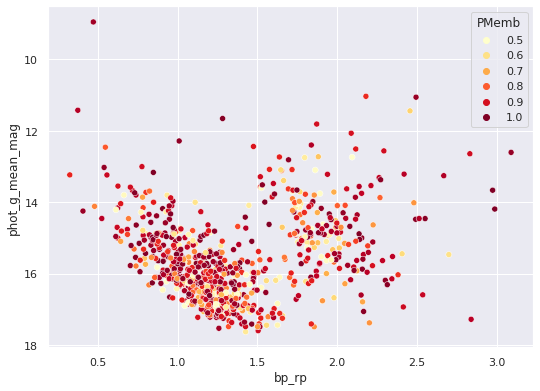

In [245]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

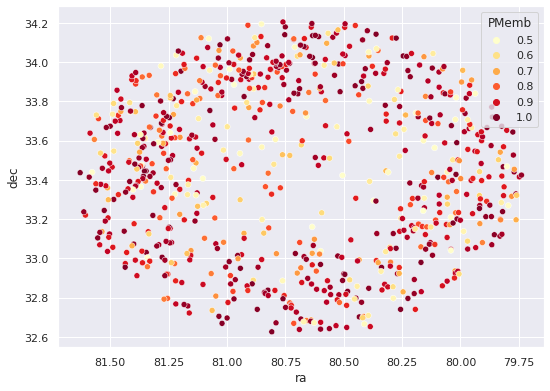

In [246]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

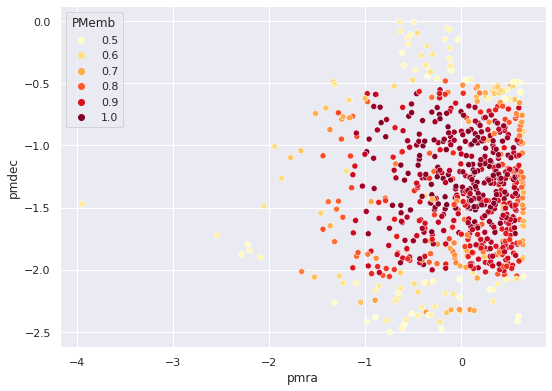

In [247]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


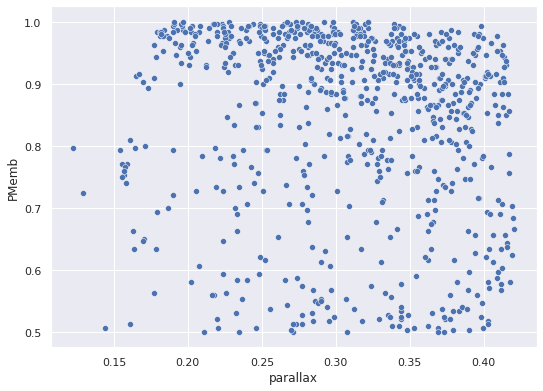

In [248]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [249]:
# saving the files as csv
# all_stars.to_csv('gaia_1893_membership_prob.csv')

potentialMember.to_csv('NGC_1893_membership_prob.csv')


### Comparing the old and new predicted members

In [250]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [251]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1893_center,member,PMemb
count,9.770000e+02,9.770000e+02,9.770000e+02,977.0,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.0,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,...,972.000000,972.000000,972.000000,977.000000,972.000000,972.000000,972.000000,32.000000,32.000000,977.000000,32.000000,32.000000,32.000000,977.000000,977.000000,977.000000,977.000000,919.000000,919.000000,919.000000,919.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,176.0,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,977.000000,977.000000,977.000000,977.000000,977.0,977.000000
mean,1.635721e+18,1.816994e+17,8.693077e+08,2015.5,80.716899,0.056253,33.451394,0.045405,0.305635,0.062795,5.459150,-0.071347,0.115511,-1.354517,0.082918,-0.152667,0.132686,-0.214125,0.242404,-0.342913,0.186002,-0.438236,0.110393,0.337146,-0.167085,152.843398,6.613101,152.045036,0.798362,0.492453,162.946396,0.039510,0.673073,31.0,28.794737,1.517914,0.012449,-0.083440,17.432958,10.361310,...,425.545410,14.717725,1.284394,0.049130,1.309473,0.585931,0.723541,-3.555302,2.391630,0.167861,4890.625000,3.250000,-0.046875,173.567306,-1.634447,82.138372,10.265735,100022.808487,4953.590332,4765.991211,5259.592285,1.438812,1.187864,1.801151,0.715059,0.584529,0.903676,200111.0,7.002671,6.137468,7.582432,34.725376,26.460768,42.990009,0.499442,4.274728,19.553177,0.499413,1.0,0.775503
std,0.000000e+00,7.401634e+14,4.916440e+08,0.0,0.464205,0.021943,0.379180,0.017384,0.066502,0.023601,2.243741,0.543964,0.049333,0.477839,0.036659,0.176813,0.130413,0.157385,0.167716,0.110978,0.136894,0.136718,0.140526,0.101137,0.187625,17.991375,29.698205,17.904803,1.246009,3.226016,95.440094,0.082111,3.685695,0.0,56.478989,0.087052,0.004919,0.067291,2.017307,0.687608,...,294.828644,1.281166,0.061177,0.230025,0.474014,0.278379,0.199883,29.517235,3.610892,0.953032,605.544006,0.457905,0.265165,0.372801,0.393648,0.394912,0.377905,207.597934,925.764038,887.500366,948.291504,0.485744,0.490079,0.517660,0.245141,0.244484,0.266397,0.0,5.911437,5.235435,6.380462,67.039009,51.154789,83.026619,0.215764,4.305778,10.892326,0.215745,0.0,0.244777
min,1.635721e+18,1.808465e+17,7.999830e+05,2015.5,79.738642,0.021950,32.625572,0.017849,0.122448,0.025537,3.001365,-3.946473,0.045293,-2.498719,0.030623,-0.794666,-0.330800,-0.683510,-0.385622,-0.796510,-0.323467,-0.792226,-0.571098,-0.074354,-0.819508,88.000000,0.000000,87.000000,0.000000,-5.626834,55.823700,0.000000,0

In [252]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1893_center,member
count,2.180000e+02,2.180000e+02,2.180000e+02,218.0,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,2.180000e+02,218.0,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,2.000000,2.000000,218.000000,2.000000,2.000000,2.0,218.000000,218.000000,218.000000,218.000000,214.000000,214.000000,214.000000,214.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,1.635721e+18,1.814099e+17,9.066911e+08,2015.5,80.735838,0.054016,33.446463,0.043271,0.294869,0.061501,5.259032,-0.126039,0.106456,-1.383908,0.075618,-0.210782,0.169138,-0.211395,0.273969,-0.392685,0.171145,-0.488370,0.151342,0.357788,-0.153693,147.371560,14.587156,146.435780,0.935780,0.619331,158.982635,0.024371,3.236815e-01,31.0,50.201633,1.555050,0.011626,-0.112133,16.738532,10.279817,...,431.480804,14.312852,1.274699,0.045872,1.113295,0.473550,0.639745,18.699157,0.960644,0.036697,5750.000000,4.000000,0.0,173.580938,-1.624572,82.154078,10.259270,100038.429907,5475.005859,5268.627441,5811.743164,1.371115,1.102307,1.727278,0.684257,0.544896,0.864200,200111.0,7.435204,6.378483,8.135204,72.355545,54.608334,90.102730,0.194730,3.431432,21.168535,0.530275,0.194725,1.0
std,0.000000e+00,5.894116e+14,5.174157e+08,0.0,0.198437,0.020562,0.152866,0.015779,0.058947,0.021731,1.829656,0.365250,0.044133,0.334835,0.031492,0.192402,0.137975,0.170830,0.170493,0.107384,0.144685,0.123856,0.139672,0.103659,0.196173,19.022774,42.271279,18.936907,1.318253,3.232102,75.675659,0.054305,9.904181e-01,0.0,84.202904,0.097577,0.003992,0.070962,2.140348,0.767818,...,378.524506,1.424037,0.064743,0.209688,0.508193,0.280122,0.232636,29.091288,0.217557,0.427760,353.553406,0.707107,0.0,0.153664,0.164926,0.168721,0.152408,271.495566,1259.684937,1200.739136,1286.522583,0.472598,0.478796,0.499179,0.233505,0.238132,0.255513,0.0,5.044431,4.305860,5.516739,129.711990,98.694420,160.921799,0.125914,2.994966,9.005566,0.341049,0.125914,0.0
min,1.635721e+18,1.809519e+17,6.862069e+06,2015.5,80.190774,0.025518,33.046711,0.020848,0.144446,0.027534,3.002039,-1.120928,0.049882,-2.314877,0.035424,-0.794666,-0.161197,-0.656294,-0.268225,-0.650375,-0.169092,-0.772315,-0.464610,0.014066,-0.751447,88.000000,0.000000,87.000000,0.000000,-5.626834,65.433289,0.000000,0.000000e+00,31.0,1.7

In [253]:
concatenated.dataset.value_counts()

New_member    759
Old_member    218
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

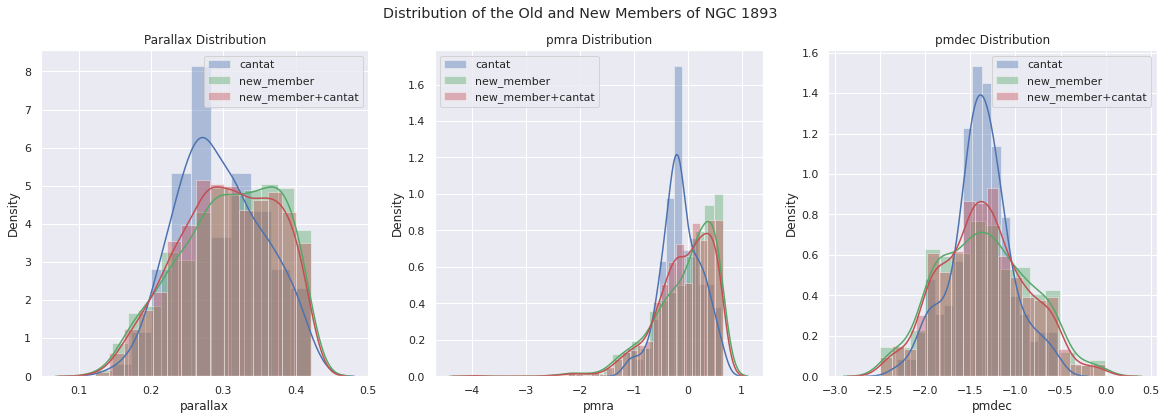

In [254]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members of NGC 1893')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


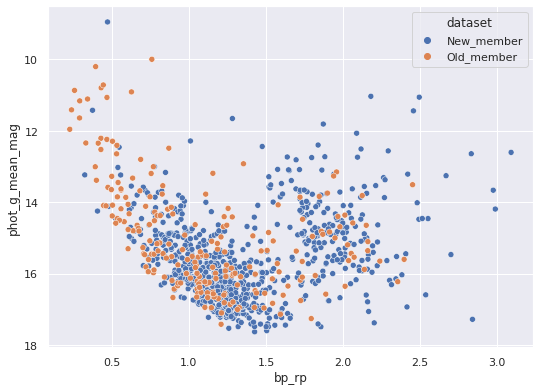

In [255]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

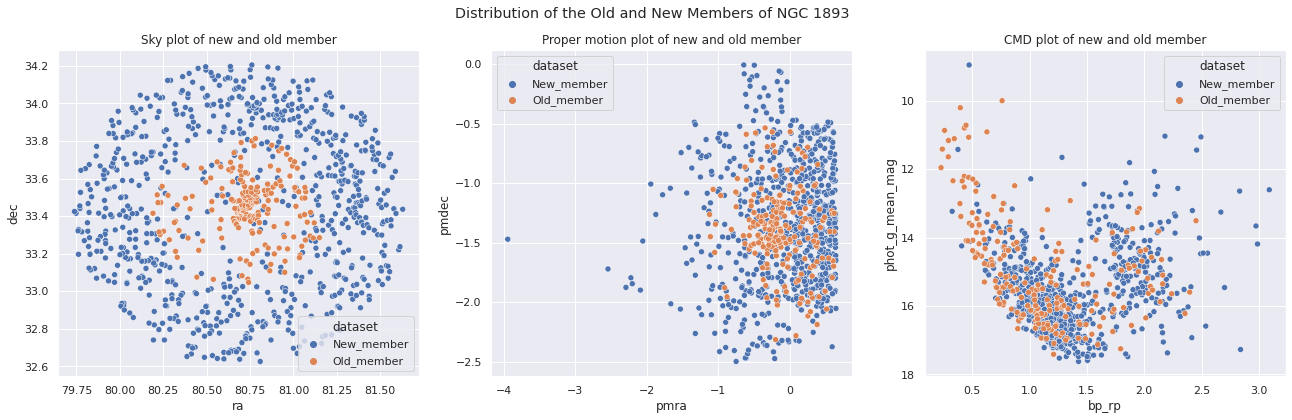

In [264]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members of NGC 1893')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD plot of new and old member')

plt.show()

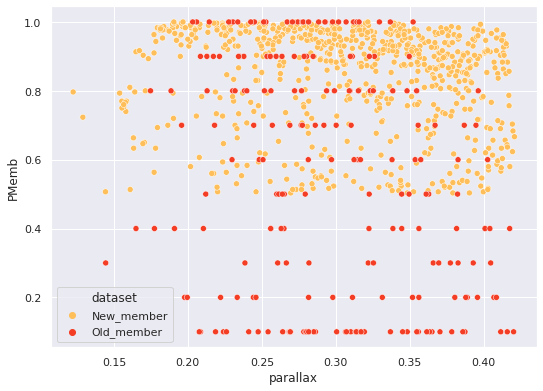

In [257]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [258]:
# pd_prof.ProfileReport(potentialMember)

In [259]:
#files.download('NGC_1893_cantat.csv')

#files.download('NGC_1893_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


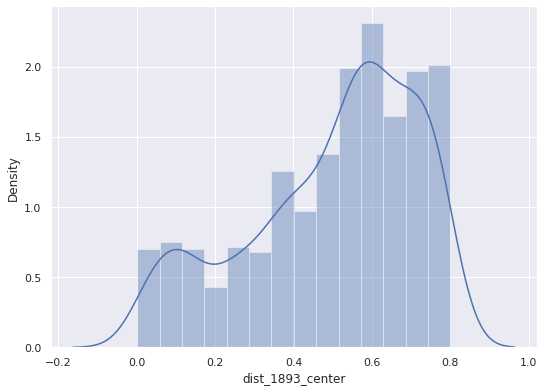

In [260]:
sns.distplot(concatenated['dist_1893_center'])

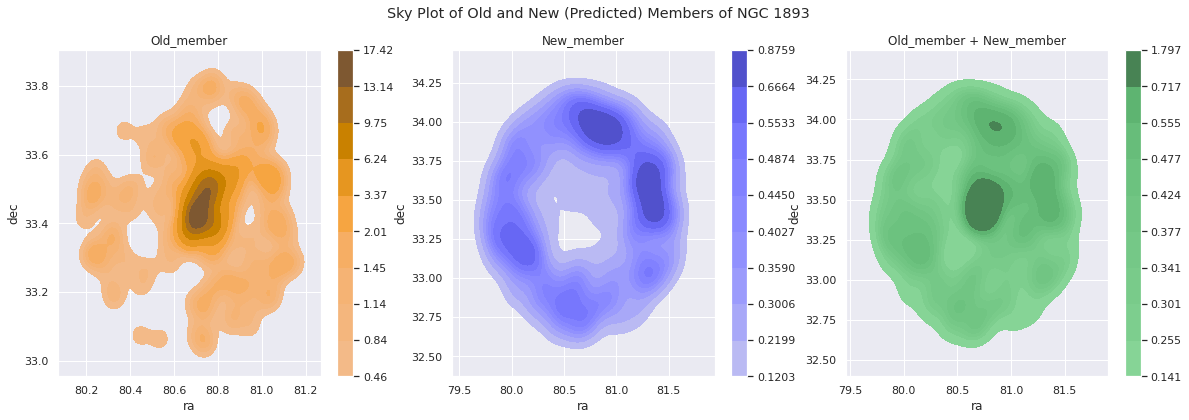

In [261]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 1893')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

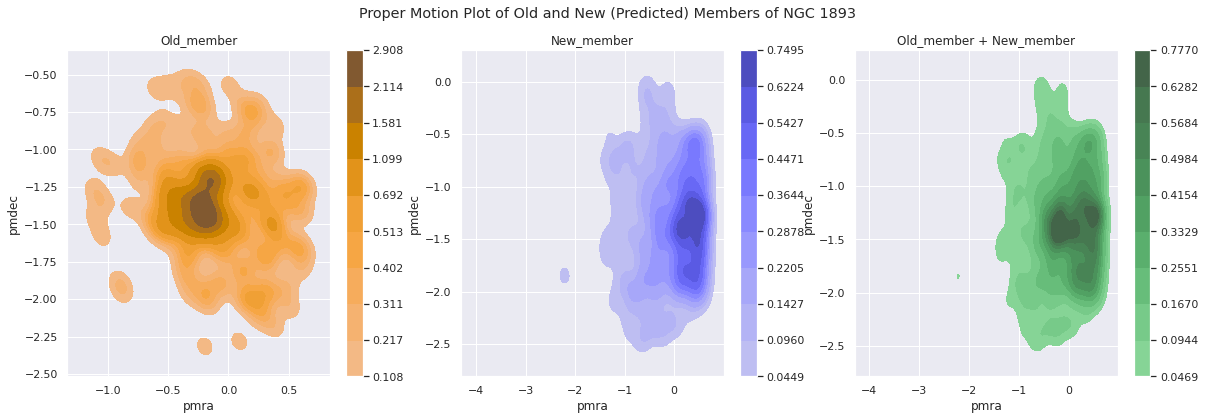

In [262]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 1893')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [263]:
#files.download('NGC_1893_cantat.csv')

potentialMember.to_csv('NGC_1893_additional_member_prob.csv')
concatenated.to_csv('NGC_1893_all_member_prob.csv')

files.download('NGC_1893_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_1893_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>